# 1. Get comments from douban 

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

page = 0
count_comm=0

while True:

    html=urlopen('https://book.douban.com/subject/1084336/comments/hot?p='+str(page+1)).read().decode('utf-8')
    soup=BeautifulSoup(html,features='lxml')
    comments=soup.find_all('span','short')
    for comment in comments:
        count_comm=count_comm+1
        if count_comm>50:
            break
        else:
            comments.append(comment.string)
            print(comment.string)
            
            

    page=page+1

    if count_comm>50 or count_star>50:
        break


# 2. Split word

In [71]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import jieba

text_from_file_with_apath = open('Douban.txt').read()

wordlist_after_jieba = jieba.cut(text_from_file_with_apath, cut_all = True)
wl_space_split = " ".join(wordlist_after_jieba)

wl_space_split
type(wl_space_split)

str

# 3. Create wordcloud

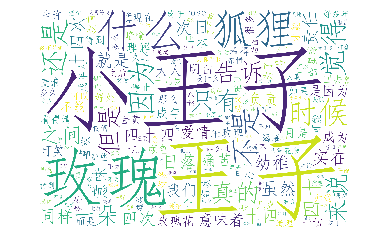

In [76]:
# 你可以通过font_path参数来设置字体集
# width,height,margin可以设置图片属性
# generate 可以对全部文本进行自动分词
font = r'C:\Windows\Fonts\simfang.ttf'

wordcloud = WordCloud(collocations=False,background_color='white',font_path=font, width=2000, height=1400, margin=2).generate(wl_space_split)

#background_color参数为设置背景颜色,默认颜色为黑色

import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

wordcloud.to_file('test.png')